<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_DL_Keras_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Deep Learning parte 2: como a rede aprende</b></font>

<font color=gray size=2><a href=https://colab.research.google.com/drive/1sshG2ikYZgvUjJWqZKKV8-7lHmTBRPE1>Arquivo Colab</a>; <a href=https://colab.research.google.com/drive/1xdfjvlDEZdxH8IrRHtVXvVKx_H-1T-HC>Parte I</a></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/course/deep-learning-como-a-rede-aprende><font size=2 color=gray>Deep Learning parte 2: como a rede aprende</a>
<li>Carga Horária: 6 h
<li>Instrutora: Cássia Sampaio
<li>Data de Início: 08-2022
</ul>

<hr color=gray><br>
<h3><b>Conteúdo / Aprendizagem:</b></h3>

- 

# <font color=orange>RESUMO</font>

<a href=https://docs.google.com/spreadsheets/d/1tTygYlq9r7nkUsw9a25N5_z57-de_59tSBCIVPw6KUw><font size=2 color=gray>ROTEIROS Data Science</font></a>

* <font color=orange><b>

* 

# <font color=orange>**CURSO I**</font>


In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# DADOS
dataset = keras.datasets.fashion_mnist
(imagens_treino, identificadores_treino), (imagens_teste, identificadores_teste) = dataset.load_data()

# DICIONÁRIO DE CLASSES
nomes_classes = {
    0: 'Camiseta', 1: 'Calça', 2: 'Pullover', 3: 'Vestido', 
    4: 'Casaco', 5: 'Sandália', 6: 'Camisa', 7: 'tênis', 
    8: 'Bolsa', 9: 'Bota'}

# MODELO
# Normalização
imagens_treino_norm = imagens_treino/255.0

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),  # Entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada 1
    keras.layers.Dropout(0.2),  # Camada 2
    keras.layers.Dense(128, activation=tensorflow.nn.relu),  # Camada 3
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)  # Camada 4 - saída
])

# Compilação
modelo.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
%time historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=7, validation_split=0.2)

# <font color=orange>**CURSO**</font>

**Projeto**: 

<font color=orange></font>

Na aprendizagem profunda, as redes aprendem com a transmissão de valores da camada de entrada até a camada de saída. Esse fluxo é chamado de *propagação* (<font color=orange>*forward propagation*</font>).

Mas as redes neurais também aprendem com o fluxo no sentido contrário, chamado de retropropagação (<font color=orange>*backpropagation*</font>).

No processo de treinamento o Keras atribui <font color=orange>pesos</font> aos neurônios que são mais significativos para o resultado de maior probabilidade. Todo esse processo é uma sequencia de multiplicações de matrizes.

> "Os pesos “privilegiam” aspectos das nossas imagens que as diferem umas das outras."



<font color=orange>[+mínimo global e locais, análise das perdas]</font>

<font color=orange>**Modelo ótimo**</font>: A escolha de um algorítmo de otimização e a obtenção do mínimo global com uma boa acurácia é o que define a qualidade de um modelo, sendo falado que o "modelo convergiu".

<a href=https://github.com/cassiass/keras-tensorflow-2/blob/master/Segundo_projeto_aula5.ipynb><font size=2; color=gray>Material de referencial do curso</a></font>

## <font color=orange>Descrição do Modelo</font>

Cada parâmetro é a conexão de um neurônio com outro. O seu conjunto forma a ideia de redes neurais. O número de Parâmetros de uma camada dense é $(n_{input} + 1)*n_{dense}$.

Este 1 é do vetor de vieses.



In [ ]:
# Descrição do modelo
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Configurações do modelo
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

## <font color=orange>Pesos - kernel matrix</font>

[Dense Layer.get_weights()](https://keras.io/api/layers/base_layer/#getweights-method) → (kernel matrix, bias vector)

`denseLayer.get_weights()[0]`

> O inicializador de kernel ou matriz de pesos é usado o  glorot uniforme e os vieses são inicializados com 0. "Glorot, pois é o sobrenome de Xavier Glorot que escreveu o artigo que define esse inicializador. Ele também é conhecido como o <font color=orange>inicializador uniforme de Xavier</font>."

`sqrt(6 / (unidades_de_entrada_do_kernel + unidades_de_saída_do_kernel )) `



In [ ]:
# Peso
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.0203223 , -0.05434692,  0.06956449, ..., -0.07449118,
         0.01032351,  0.07844752],
       [-0.1676414 , -0.23080726,  0.07318403, ..., -0.08472175,
        -0.05743122,  0.02866836],
       [-0.22834276, -0.09095304,  0.02592203, ...,  0.10012282,
        -0.12115195, -0.05494787],
       ...,
       [-0.05286543, -0.02062679,  0.09179842, ...,  0.17969309,
        -0.07743031, -0.02969291],
       [-0.03520177,  0.2197236 ,  0.06628781, ...,  0.08246799,
        -0.15859659,  0.09129699],
       [-0.23934402,  0.07019272, -0.12293436, ..., -0.03656709,
        -0.07761386,  0.14493692]], dtype=float32)

## <font color=orange>Vieses - Bias vector</font>

O viés é a distância atribuída pelo modelo a dois objetos. Quanto maior o viés, maior o custo de se atribuir certas características a determinados classes. 

Um exemplo no caso de classificações, um modelo errar uma imagem de uma saia e chamar de vestido é um erro mais próximo do que chama-la de sapato.

> "Repare que a nossa rede errou, logo, os valores que foram propagados foram também recalculados. Por ter errado, nossa rede diminuiu o peso, e por ter se afastado da curva ideal, aumentou o viés."

`denseLayer.get_weights()[1]`

In [ ]:
# Vieses
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([-0.37184796, -0.30645618,  0.22276644,  0.07386806,  0.23295468,
       -0.02646765, -0.03995598, -0.3424906 ,  0.17032586,  0.29668975,
       -0.20523228,  0.01752654, -0.02032887, -0.10433159,  0.19188114,
       -0.02217072,  0.09411247,  0.06997454,  0.09082602, -0.02782436,
        0.1463919 , -0.04403247, -0.01646684, -0.3338928 , -0.1736118 ,
       -0.01899808, -0.06577497,  0.32053757, -0.15422074,  0.0759829 ,
        0.26991618, -0.00603891, -0.00930617, -0.06467654,  0.01668806,
       -0.02390064, -0.265832  , -0.01317765,  0.34877917, -0.01830917,
       -0.10448035,  0.09783575,  0.25655273, -0.00654598, -0.01787722,
       -0.01213841, -0.16145372,  0.04261443,  0.11383726, -0.28154045,
        0.19448029,  0.39470583,  0.1093784 ,  0.21115705,  0.07706273,
        0.25527278,  0.32388586,  0.05630631,  0.03114285,  0.11572973,
        0.06445594,  0.13769847,  0.4787609 , -0.00576084,  0.398069  ,
       -0.30625904, -0.15054882,  0.0800378 , -0.02693936, -0.28

## Experimentações com pesos

O que aconteceria se o modelo começasse com os pesos zerados?

### Teste peso zerado

In [ ]:
# Criação de array de zeros
pesos_camada_dense.shape

pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_zerados

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Atribuição de pesos à camada densa
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-0.37184796, -0.30645618,  0.22276644,  0.07386806,  0.23295468,
        -0.02646765, -0.03995598, -0.3424906 ,  0.17032586,  0.29668975,
        -0.20523228,  0.01752654, -0.02032887, -0.10433159,  0.19188114,
        -0.02217072,  0.09411247,  0.06997454,  0.09082602, -0.02782436,
         0.1463919 , -0.04403247, -0.01646684, -0.3338928 , -0.1736118 ,
        -0.01899808, -0.06577497,  0.32053757, -0.15422074,  0.0759829 ,
         0.26991618, -0.00603891, -0.00930617, -0.06467654,  0.01668806,
        -0.02390064, -0.265832  , -0.01317765,  0.34877917, -0.01830917,
        -0.10448035,  0.09783575,  0.25655273, -0.00654598, -0.01787722,
        -0.01213841, -0.16145372,  0.04261443,  0.11383726, -0.28154045,
      

In [ ]:
# Teste de performance do modelo
# Compilação
modelo.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
%time historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5439 - accuracy: 0.8004 - val_loss: 0.4057 - val_accuracy: 0.8538
Epoch 2/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4070 - accuracy: 0.8478 - val_loss: 0.3828 - val_accuracy: 0.8572
Epoch 3/7
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3781 - accuracy: 0.8590 - val_loss: 0.3575 - val_accuracy: 0.8681
Epoch 4/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3525 - accuracy: 0.8690 - val_loss: 0.3623 - val_accuracy: 0.8636
Epoch 5/7
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3377 - accuracy: 0.8736 - val_loss: 0.3436 - val_accuracy: 0.8700
Epoch 6/7
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3254 - accuracy: 0.8779 - val_loss: 0.3332 - val_accuracy: 0.8813
Epoch 7/7
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3144 - accuracy: 0.8838 - val_loss: 0.3405 - val_accuracy: 0.8

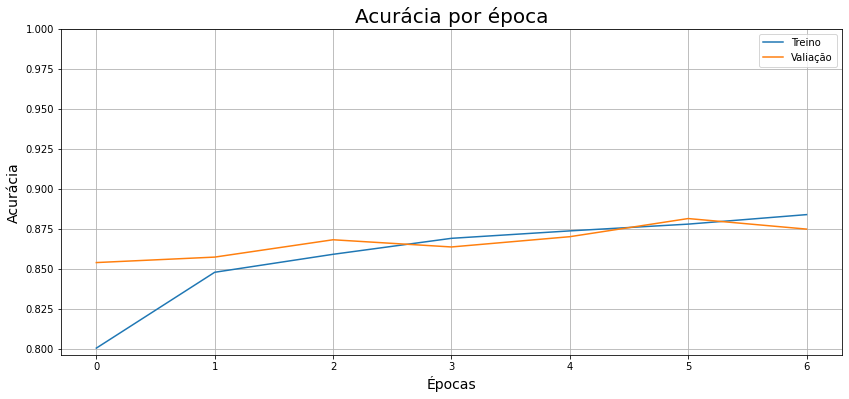

In [ ]:
# GRÁFICO DE ACURÁCIA
plt.figure(figsize=(14,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Treino', 'Valiação'])

plt.grid()
plt.xticks(range(len(historico.history['accuracy'])))
plt.title('Acurácia por época', fontsize=20)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.ylim(top=1)
plt.show()

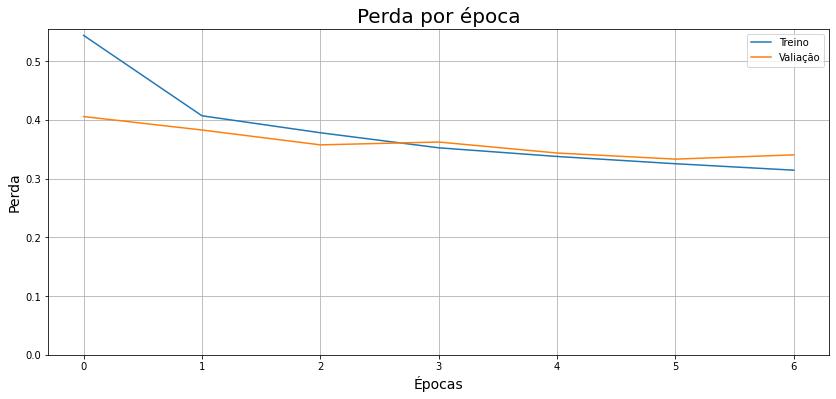

In [ ]:
# GRÁFICO DE PERDA
plt.figure(figsize=(14,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Treino', 'Valiação'])

plt.grid()
plt.xticks(range(len(historico.history['loss'])))
plt.title('Perda por época', fontsize=20)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Perda', fontsize=14)
plt.ylim(bottom=0)
plt.show()

A inicialização do modelo com peso zerado é chamado de inicialização **simétrica**. Mas isso gera problemas ao modelo, por não dar mais atenção a características mais importantes do outras. Essa diferenciação é chamada de inicialização **assimétrica**.

### Teste pesos aleatórios

In [ ]:
# Criação de array de aleatórios [-1, 1]
pesos_camada_dense.shape

# pesos_camada_dense_aleatorios = np.random.rand(784, 256)*2-1
pesos_camada_dense_aleatorios = np.array([np.random.normal(size=256) for i in range(784)])
pesos_camada_dense_aleatorios.shape

(784, 256)

In [ ]:
# Atribuição de pesos à camada densa
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[-5.3377330e-01, -2.1762562e+00,  2.0191758e+00, ...,
         -1.3522694e-01, -1.8089636e-01,  9.6506492e-04],
        [ 2.4757566e-01,  6.1436749e-01, -1.7189987e+00, ...,
         -3.8702658e-01, -1.3553227e+00,  5.1383632e-01],
        [-1.2184538e-02, -1.1071978e-01, -1.3915074e+00, ...,
         -6.0635668e-01, -3.1917775e-01,  4.6102095e-01],
        ...,
        [-2.4950984e+00,  4.5023188e-01,  1.7228109e+00, ...,
          2.5305398e+00,  2.1699963e+00, -3.5270476e-01],
        [ 5.8411556e-01,  9.9185377e-01, -6.5096706e-01, ...,
          4.6175420e-01,  6.5598345e-01, -1.1345719e+00],
        [-3.2753384e-01, -5.7405168e-01, -6.9327927e-01, ...,
          1.1224138e+00,  1.8370138e+00,  8.1345278e-01]], dtype=float32),
 array([-0.37184796, -0.30645618,  0.22276644,  0.07386806,  0.23295468,
        -0.02646765, -0.03995598, -0.3424906 ,  0.17032586,  0.29668975,
        -0.20523228,  0.01752654, -0.02032887, -0.10433159,  0.19188114,
        -0.02217072,  0.0941124

In [ ]:
# Teste de performance do modelo
# Compilação
modelo.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
%time historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 7s 4ms/step - loss: 1.4730 - accuracy: 0.6401 - val_loss: 0.5804 - val_accuracy: 0.7826
Epoch 2/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5793 - accuracy: 0.7866 - val_loss: 0.4878 - val_accuracy: 0.8197
Epoch 3/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4886 - accuracy: 0.8214 - val_loss: 0.4335 - val_accuracy: 0.8463
Epoch 4/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4418 - accuracy: 0.8394 - val_loss: 0.4057 - val_accuracy: 0.8542
Epoch 5/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4079 - accuracy: 0.8504 - val_loss: 0.3896 - val_accuracy: 0.8572
Epoch 6/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3834 - accuracy: 0.8585 - val_loss: 0.3784 - val_accuracy: 0.8615
Epoch 7/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3642 - accuracy: 0.8665 - val_loss: 0.3721 - val_accuracy: 0.8637

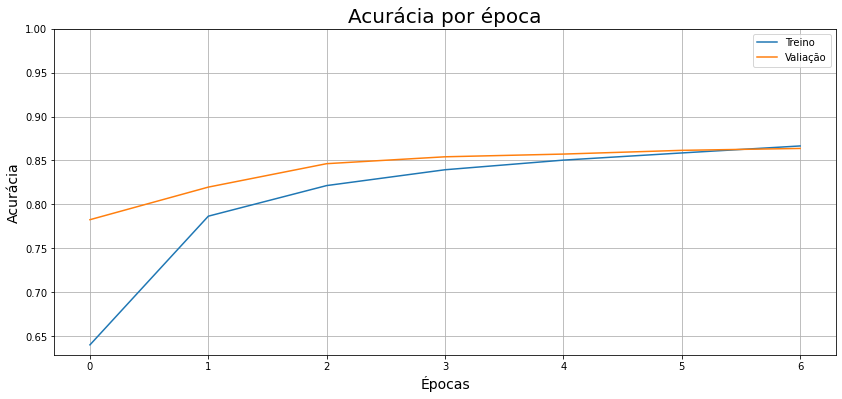

In [ ]:
# GRÁFICO DE ACURÁCIA
plt.figure(figsize=(14,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Treino', 'Valiação'])

plt.grid()
plt.xticks(range(len(historico.history['accuracy'])))
plt.title('Acurácia por época', fontsize=20)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.ylim(top=1)
plt.show()

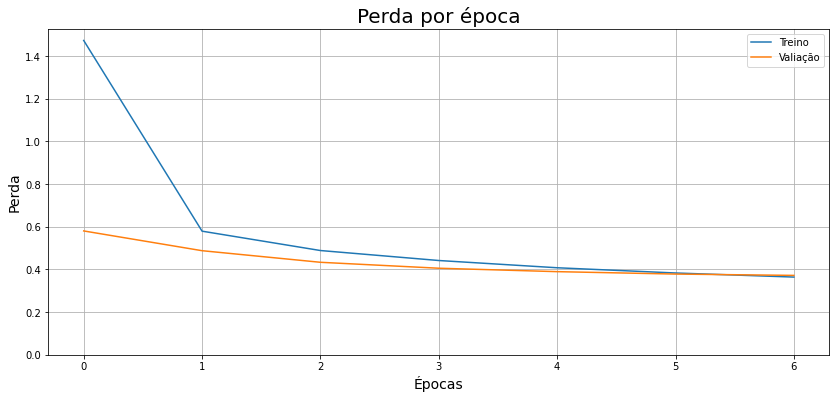

In [ ]:
# GRÁFICO DE PERDA
plt.figure(figsize=(14,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Treino', 'Valiação'])

plt.grid()
plt.xticks(range(len(historico.history['loss'])))
plt.title('Perda por época', fontsize=20)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Perda', fontsize=14)
plt.ylim(bottom=0)
plt.show()

Aqui foi observado um dos tópicos de debate em redes neurais, que quando os números de pesos são muito pequenos, ou muito grandes, o modelo não conseque aprender.

Então como o Keras faz?

In [ ]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

## Experimentações com Vieses

O que aconteceria se o modelo começasse com os pesos zerados?

### Teste vieses zerado

In [ ]:
# Criação de array zerado
vieses_camada_dense_zerados = np.zeros((256,))

# Atribuição de pesos à camada densa
modelo.layers[1].set_weights([pesos_camada_dense, vieses_camada_dense_zerados])

modelo.layers[1].get_weights()

[array([[ 0.0203223 , -0.05434692,  0.06956449, ..., -0.07449118,
          0.01032351,  0.07844752],
        [-0.1676414 , -0.23080726,  0.07318403, ..., -0.08472175,
         -0.05743122,  0.02866836],
        [-0.22834276, -0.09095304,  0.02592203, ...,  0.10012282,
         -0.12115195, -0.05494787],
        ...,
        [-0.05286543, -0.02062679,  0.09179842, ...,  0.17969309,
         -0.07743031, -0.02969291],
        [-0.03520177,  0.2197236 ,  0.06628781, ...,  0.08246799,
         -0.15859659,  0.09129699],
        [-0.23934402,  0.07019272, -0.12293436, ..., -0.03656709,
         -0.07761386,  0.14493692]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
# Teste de performance do modelo
# Compilação
modelo.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
%time historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3188 - accuracy: 0.8821 - val_loss: 0.3322 - val_accuracy: 0.8820
Epoch 2/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2960 - accuracy: 0.8898 - val_loss: 0.3178 - val_accuracy: 0.8833
Epoch 3/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2828 - accuracy: 0.8923 - val_loss: 0.3221 - val_accuracy: 0.8857
Epoch 4/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2784 - accuracy: 0.8955 - val_loss: 0.3196 - val_accuracy: 0.8893
Epoch 5/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2685 - accuracy: 0.8979 - val_loss: 0.3030 - val_accuracy: 0.8898
Epoch 6/7
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2643 - accuracy: 0.9010 - val_loss: 0.3185 - val_accuracy: 0.8857
Epoch 7/7
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2589 - accuracy: 0.9027 - val_loss: 0.3103 - val_accuracy: 0.8910

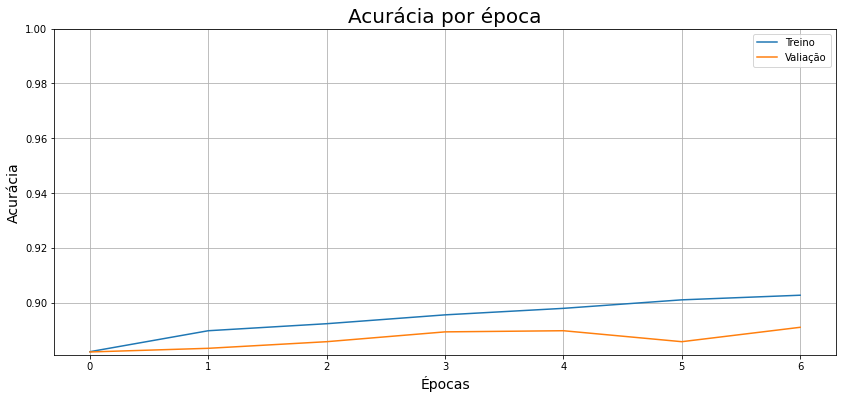

In [ ]:
# GRÁFICO DE ACURÁCIA
plt.figure(figsize=(14,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Treino', 'Valiação'])

plt.grid()
plt.xticks(range(len(historico.history['accuracy'])))
plt.title('Acurácia por época', fontsize=20)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.ylim(top=1)
plt.show()

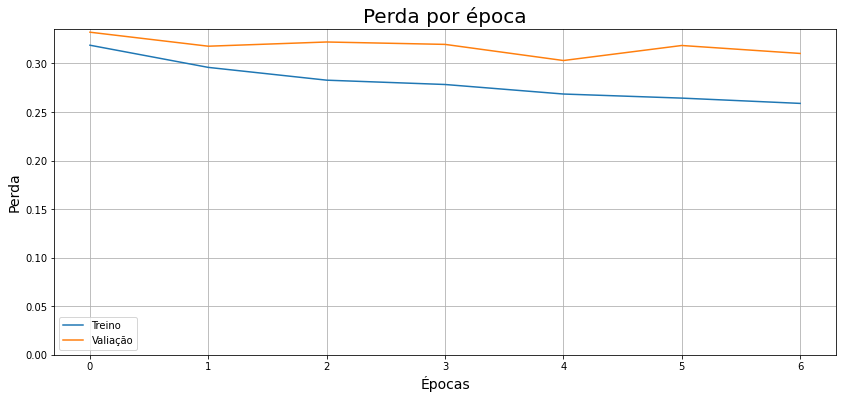

In [ ]:
# GRÁFICO DE PERDA
plt.figure(figsize=(14,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Treino', 'Valiação'])

plt.grid()
plt.xticks(range(len(historico.history['loss'])))
plt.title('Perda por época', fontsize=20)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Perda', fontsize=14)
plt.ylim(bottom=0)
plt.show()

### Teste vieses aleatórios

In [ ]:
# Criação de array aleatórios
#    - [-10, 10]
vieses_camada_dense_aleatorios = np.random.rand(256,)*20-10

# Atribuição de pesos à camada densa
modelo.layers[1].set_weights([pesos_camada_dense, vieses_camada_dense_aleatorios])

modelo.layers[1].get_weights()

[array([[ 0.0203223 , -0.05434692,  0.06956449, ..., -0.07449118,
          0.01032351,  0.07844752],
        [-0.1676414 , -0.23080726,  0.07318403, ..., -0.08472175,
         -0.05743122,  0.02866836],
        [-0.22834276, -0.09095304,  0.02592203, ...,  0.10012282,
         -0.12115195, -0.05494787],
        ...,
        [-0.05286543, -0.02062679,  0.09179842, ...,  0.17969309,
         -0.07743031, -0.02969291],
        [-0.03520177,  0.2197236 ,  0.06628781, ...,  0.08246799,
         -0.15859659,  0.09129699],
        [-0.23934402,  0.07019272, -0.12293436, ..., -0.03656709,
         -0.07761386,  0.14493692]], dtype=float32),
 array([ 7.5787253 , -3.4202967 ,  9.7308655 ,  0.537601  ,  7.7967534 ,
         2.1406333 ,  8.843178  , -6.063421  , -0.81917864, -7.384264  ,
         0.23797433,  4.6998777 ,  5.7656035 , -4.947745  ,  8.44666   ,
         8.566498  ,  5.5757947 , -1.6133659 ,  7.344778  ,  1.2595154 ,
         5.4077687 ,  9.645593  , -2.344495  , -2.0067222 ,  8.525

In [ ]:
# Teste de performance do modelo
# Compilação
modelo.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
%time historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4406 - accuracy: 0.8413 - val_loss: 0.3492 - val_accuracy: 0.8712
Epoch 2/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3436 - accuracy: 0.8720 - val_loss: 0.3514 - val_accuracy: 0.8729
Epoch 3/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3224 - accuracy: 0.8786 - val_loss: 0.3340 - val_accuracy: 0.8798
Epoch 4/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3083 - accuracy: 0.8835 - val_loss: 0.3303 - val_accuracy: 0.8806
Epoch 5/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2987 - accuracy: 0.8874 - val_loss: 0.3213 - val_accuracy: 0.8839
Epoch 6/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2886 - accuracy: 0.8912 - val_loss: 0.3167 - val_accuracy: 0.8854
Epoch 7/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2794 - accuracy: 0.8939 - val_loss: 0.3190 - val_accuracy: 0.8848

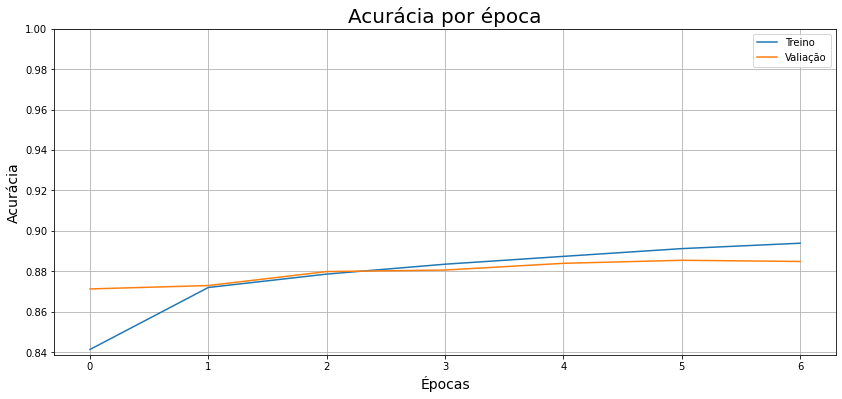

In [ ]:
# GRÁFICO DE ACURÁCIA
plt.figure(figsize=(14,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Treino', 'Valiação'])

plt.grid()
plt.xticks(range(len(historico.history['accuracy'])))
plt.title('Acurácia por época', fontsize=20)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.ylim(top=1)
plt.show()

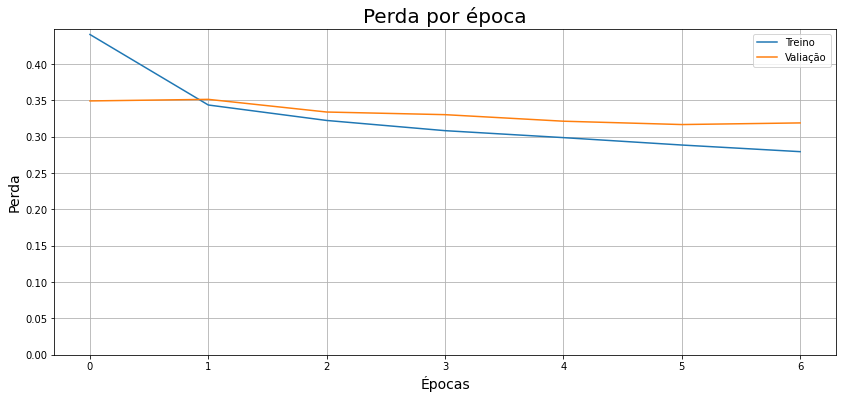

In [ ]:
# GRÁFICO DE PERDA
plt.figure(figsize=(14,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Treino', 'Valiação'])

plt.grid()
plt.xticks(range(len(historico.history['loss'])))
plt.title('Perda por época', fontsize=20)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Perda', fontsize=14)
plt.ylim(bottom=0)
plt.show()

## <font color=orange>ReLU</font>

A função de ativação no Deep Learning, ou seja, o que acontece por baixo dos panos nas redes neurais são diversas transformações nas camadas ocultas (<font color=orange>*hidden layers*</font>), inúmeras multiplicações e somas de matrizes.

$$output = activate( dot( input, kernel) + bias )$$

<h3>$$output = (i * w) + bias$$</h3>

## <font color=orange>Gradiente Descendente</font>

É uma função que o Keras aplica por trás dos panos para encontrar o menor valor de perda no modelo. A intensidade da diminuição é chamado de <font color=orange>*momentum*</font>.

Então o objetivo nas redes neurais é encontrar o **valor mínimo de perda**. No entanto, pode acontecer do modelo encontrar um valor e considerá-lo o mínimo, sem que ele seja o mínimo valor de perda possível. Esses são chamados de <font color=orange>**mínimos locais**</font>. O menor mínimo possível é chamado de <font color=orange>**mínimo global**</font>. 

A baixa intensidade do *momentum* poderá fazer o modelo parar rapidamente em mínimos locais.

Ao processar o modelo, o gradiente descendente terá que executar todos os exemplos de treino para encontrar o mínimo global. Mas isso pode ser inviável computacionalmente. Uma entratégia é escolher pontos aleatórios para avaliação para inferência do mínimo local. Esse processo aleatório é chamado de **estocástico**. Logo, este método é chamado de <font color=orange>**Gradiente Descendente Estocástico**</font>.

## <font color=orange>Adam</font>

*Estimativa de momento adaptável (<font color=orange>adaptive moment estimation</font>)*

É um método que usa o gradiente descendente estocástico e avalia também o momento, ajustando os vieses.

### Hiperparâmetros do ADAM

In [ ]:
keras.optimizers.Adam(lr=0.001)

# lr - learing rate - taxa de aprendizado (momentum)

## Hiperparâmetros


In [ ]:
# Teste de performance do modelo - baseline
# Compilação
modelo.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
%time historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2769 - accuracy: 0.8950 - val_loss: 0.3157 - val_accuracy: 0.8849
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2685 - accuracy: 0.8973 - val_loss: 0.3241 - val_accuracy: 0.8853
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2607 - accuracy: 0.8999 - val_loss: 0.3189 - val_accuracy: 0.8834
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2546 - accuracy: 0.9019 - val_loss: 0.3171 - val_accuracy: 0.8879
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2507 - accuracy: 0.9054 - val_loss: 0.3264 - val_accuracy: 0.8895
CPU times: user 43.6 s, sys: 3.09 s, total: 46.6 s
Wall time: 38.3 s


In [ ]:
# Teste de performance do modelo - adam
# Compilação

adam = keras.optimizers.Adam(lr=0.001)
modelo.compile(
    optimizer=adam, 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
%time historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=5, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1500/1500 [==============================] - 7s 5ms/step - loss: 0.2507 - accuracy: 0.9040 - val_loss: 0.3144 - val_accuracy: 0.8862
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2450 - accuracy: 0.9056 - val_loss: 0.3145 - val_accuracy: 0.8914
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2380 - accuracy: 0.9084 - val_loss: 0.3203 - val_accuracy: 0.8908
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2346 - accuracy: 0.9105 - val_loss: 0.3102 - val_accuracy: 0.8943
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2356 - accuracy: 0.9097 - val_loss: 0.3253 - val_accuracy: 0.8878
CPU times: user 41.6 s, sys: 2.88 s, total: 44.5 s
Wall time: 33.8 s


In [ ]:
# Teste de performance do modelo - adam(lr=0.5)
# Compilação

adam = keras.optimizers.Adam(lr=0.5)
modelo.compile(
    optimizer=adam, 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
%time historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 24.0875 - accuracy: 0.1032 - val_loss: 2.3403 - val_accuracy: 0.1005
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3604 - accuracy: 0.0991 - val_loss: 2.3635 - val_accuracy: 0.1003
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 3.1549 - accuracy: 0.0991 - val_loss: 2.3593 - val_accuracy: 0.1030
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3598 - accuracy: 0.1020 - val_loss: 2.3924 - val_accuracy: 0.1005
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3590 - accuracy: 0.1000 - val_loss: 2.3331 - val_accuracy: 0.1005
CPU times: user 41.2 s, sys: 2.64 s, total: 43.8 s
Wall time: 35.8 s


### Batch size

Permite acelerar o processo de treinamento.

In [ ]:
# Teste de performance do modelo - adam(lr=0.5) + batch_size=480
# Compilação

adam = keras.optimizers.Adam(learning_rate=0.001)
modelo.compile(
    optimizer=adam, 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=5, validation_split=0.2,
    batch_size=480)  # 10% da amostra

Epoch 1/5
100/100 [==============================] - 3s 21ms/step - loss: 0.2391 - accuracy: 0.9094 - val_loss: 0.3001 - val_accuracy: 0.8928
Epoch 2/5
100/100 [==============================] - 2s 17ms/step - loss: 0.2310 - accuracy: 0.9126 - val_loss: 0.2982 - val_accuracy: 0.8932
Epoch 3/5
100/100 [==============================] - 2s 17ms/step - loss: 0.2270 - accuracy: 0.9134 - val_loss: 0.2970 - val_accuracy: 0.8949
Epoch 4/5
100/100 [==============================] - 2s 17ms/step - loss: 0.2225 - accuracy: 0.9162 - val_loss: 0.2927 - val_accuracy: 0.8963
Epoch 5/5
100/100 [==============================] - 2s 17ms/step - loss: 0.2193 - accuracy: 0.9169 - val_loss: 0.2963 - val_accuracy: 0.8963


In [ ]:
# Teste de performance do modelo - adam(lr=0.5) + batch_size=480
# Compilação

adam = keras.optimizers.Adam(learning_rate=0.002)
modelo.compile(
    optimizer=adam, 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=5, validation_split=0.2,
    batch_size=480)  # 10% da amostra

Epoch 1/5
100/100 [==============================] - 2s 18ms/step - loss: 0.2351 - accuracy: 0.9097 - val_loss: 0.2996 - val_accuracy: 0.8945
Epoch 2/5
100/100 [==============================] - 2s 17ms/step - loss: 0.2298 - accuracy: 0.9130 - val_loss: 0.2967 - val_accuracy: 0.8970
Epoch 3/5
100/100 [==============================] - 2s 17ms/step - loss: 0.2263 - accuracy: 0.9134 - val_loss: 0.2939 - val_accuracy: 0.8946
Epoch 4/5
100/100 [==============================] - 2s 17ms/step - loss: 0.2241 - accuracy: 0.9143 - val_loss: 0.3055 - val_accuracy: 0.8928
Epoch 5/5
100/100 [==============================] - 2s 17ms/step - loss: 0.2164 - accuracy: 0.9171 - val_loss: 0.3001 - val_accuracy: 0.8942


## Checkpoints do Modelo - estudo de hiperparâmetros

### Call Back - mínimo local

Quando identificado um mínimo local, o Keras permite interromper o processo. Para identificar isso, quando a perda de validação se tornar cosntante, o modelo deverá ser interrompido mais cedo.

In [ ]:
# Teste de performance do modelo - adam(lr=0.5) + batch_size=480
# Compilação

adam = keras.optimizers.Adam(learning_rate=0.5)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                             monitor='val_loss',
                                             save_best_only=True,)]

modelo.compile(
    optimizer=adam, 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Treino e histórico da rede
historico = modelo.fit(imagens_treino_norm, identificadores_treino, epochs=5, validation_split=0.2,
    batch_size=480,
    callbacks=callbacks)  # 10% da amostra

Epoch 1/5
100/100 [==============================] - 2s 19ms/step - loss: 2.3633 - accuracy: 0.0989 - val_loss: 2.3391 - val_accuracy: 0.0983
Epoch 2/5
100/100 [==============================] - 2s 17ms/step - loss: 2.3147 - accuracy: 0.0997 - val_loss: 2.3207 - val_accuracy: 0.1027
